In [90]:
import datetime
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
import matplotlib.pyplot as plt
%matplotlib notebook

In [91]:
stock_symbol = 'TCS.NS'

my_stock = pd.DataFrame()

my_stock = yf(ticker = stock_symbol, 
                       result_range='1y',
                       interval = '1d',
                       dropna = True).result[['Open', 'High', 'Low', 'Close']]

print('Shape of the dataframe: ', my_stock.shape)

my_stock.head()

Shape of the dataframe:  (250, 4)


/home/arjun/anaconda3/lib/python3.7/site-packages/yahoo_finance_api-0.0.1-py3.7.egg/yahoo_finance_api/__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,Open,High,Low,Close
2019-10-16 09:15:00,2038.0,2056.00,2016.00,2046.40
2019-10-17 09:15:00,2014.0,2038.00,1999.30,2030.95
2019-10-18 09:15:00,2037.5,2063.90,2025.00,2057.35
2019-10-22 09:15:00,2080.0,2111.50,2040.05,2051.40
2019-10-23 09:15:00,2060.0,2083.85,2052.50,2070.10


In [78]:
my_stock.index = pd.DatetimeIndex(data = my_stock.index)
my_stock.index

DatetimeIndex(['2019-10-16 09:15:00', '2019-10-17 09:15:00',
               '2019-10-18 09:15:00', '2019-10-22 09:15:00',
               '2019-10-23 09:15:00', '2019-10-24 09:15:00',
               '2019-10-25 09:00:00', '2019-10-29 09:15:00',
               '2019-10-30 09:15:00', '2019-10-31 09:15:00',
               ...
               '2020-10-05 09:15:00', '2020-10-06 09:15:00',
               '2020-10-07 09:15:00', '2020-10-08 09:15:00',
               '2020-10-09 09:15:00', '2020-10-12 09:15:00',
               '2020-10-13 09:15:00', '2020-10-14 09:15:00',
               '2020-10-15 09:15:00', '2020-10-16 11:54:41'],
              dtype='datetime64[ns]', length=250, freq=None)

In [79]:
stock_close_copy = my_stock.copy()

In [82]:
sample_size = 100
col = stock_close_copy['Close'].shift(1)
col = stock_close_copy['Open']
stock_close_copy['OC'] = (stock_close_copy['Close'] - col)/col

stock_close_copy['Q0'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.0))
stock_close_copy['Q1'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.25))
stock_close_copy['Q2'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.5))
stock_close_copy['Q3'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(0.75))
stock_close_copy['Q4'] = col * ( 1 + stock_close_copy['OC'].shift(1).rolling(sample_size).quantile(1.0))
stock_close_copy = stock_close_copy.dropna().reset_index(drop = True)
stock_close_copy

,Open,High,Low,Close,OC,Q0,Q1,Q2,Q3,Q4,Up,Bottom,Bar,Body,Color
0,1785.00,1812.00,1727.80,1735.15,-0.027927,1659.234375,1762.342494,1781.608288,1801.083844,1968.373160,False,1735.15,84.20,49.85,r
1,1709.95,1764.90,1675.05,1716.05,0.003567,1589.472168,1686.870215,1706.700892,1725.357602,1885.613268,True,1709.95,89.85,6.10,g
2,1800.00,1851.95,1753.00,1806.20,0.003444,1673.177521,1777.152095,1797.406073,1816.219003,1984.914110,True,1800.00,98.95,6.20,g
3,1830.00,1830.00,1802.50,1818.65,-0.006202,1701.063813,1806.771296,1828.042679,1846.489319,2017.996012,False,1818.65,27.50,11.35,r
4,1765.00,1794.60,1727.70,1737.65,-0.015496,1640.643514,1742.596359,1762.456511,1780.903633,1946.318558,False,1737.65,66.90,27.35,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2815.50,2854.00,2800.75,2830.00,0.005150,2680.183622,2793.007759,2812.462659,2837.963818,2945.986259,True,2815.50,53.25,14.50,g
126,2845.00,2854.90,2812.20,2826.55,-0.006485,2708.265816,2822.272091,2841.930835,2867.196943,2976.853457,False,2826.55,42.70,18.45,r
127,2842.00,2842.00,2787.55,2809.60,-0.011400,2705.410000,2819.296058,2838.492009,2863.923828,2973.714420,False,2809.60,54.45,32.40,r
128,2811.00,2827.75,2727.00,2740.60,-0.025044,2675.899898,2788.543708,2807.530274,2832.684687,2941.277704,False,2740.60,100.75,70.40,r


In [84]:
# plot the histogram

<IPython.core.display.Javascript object>


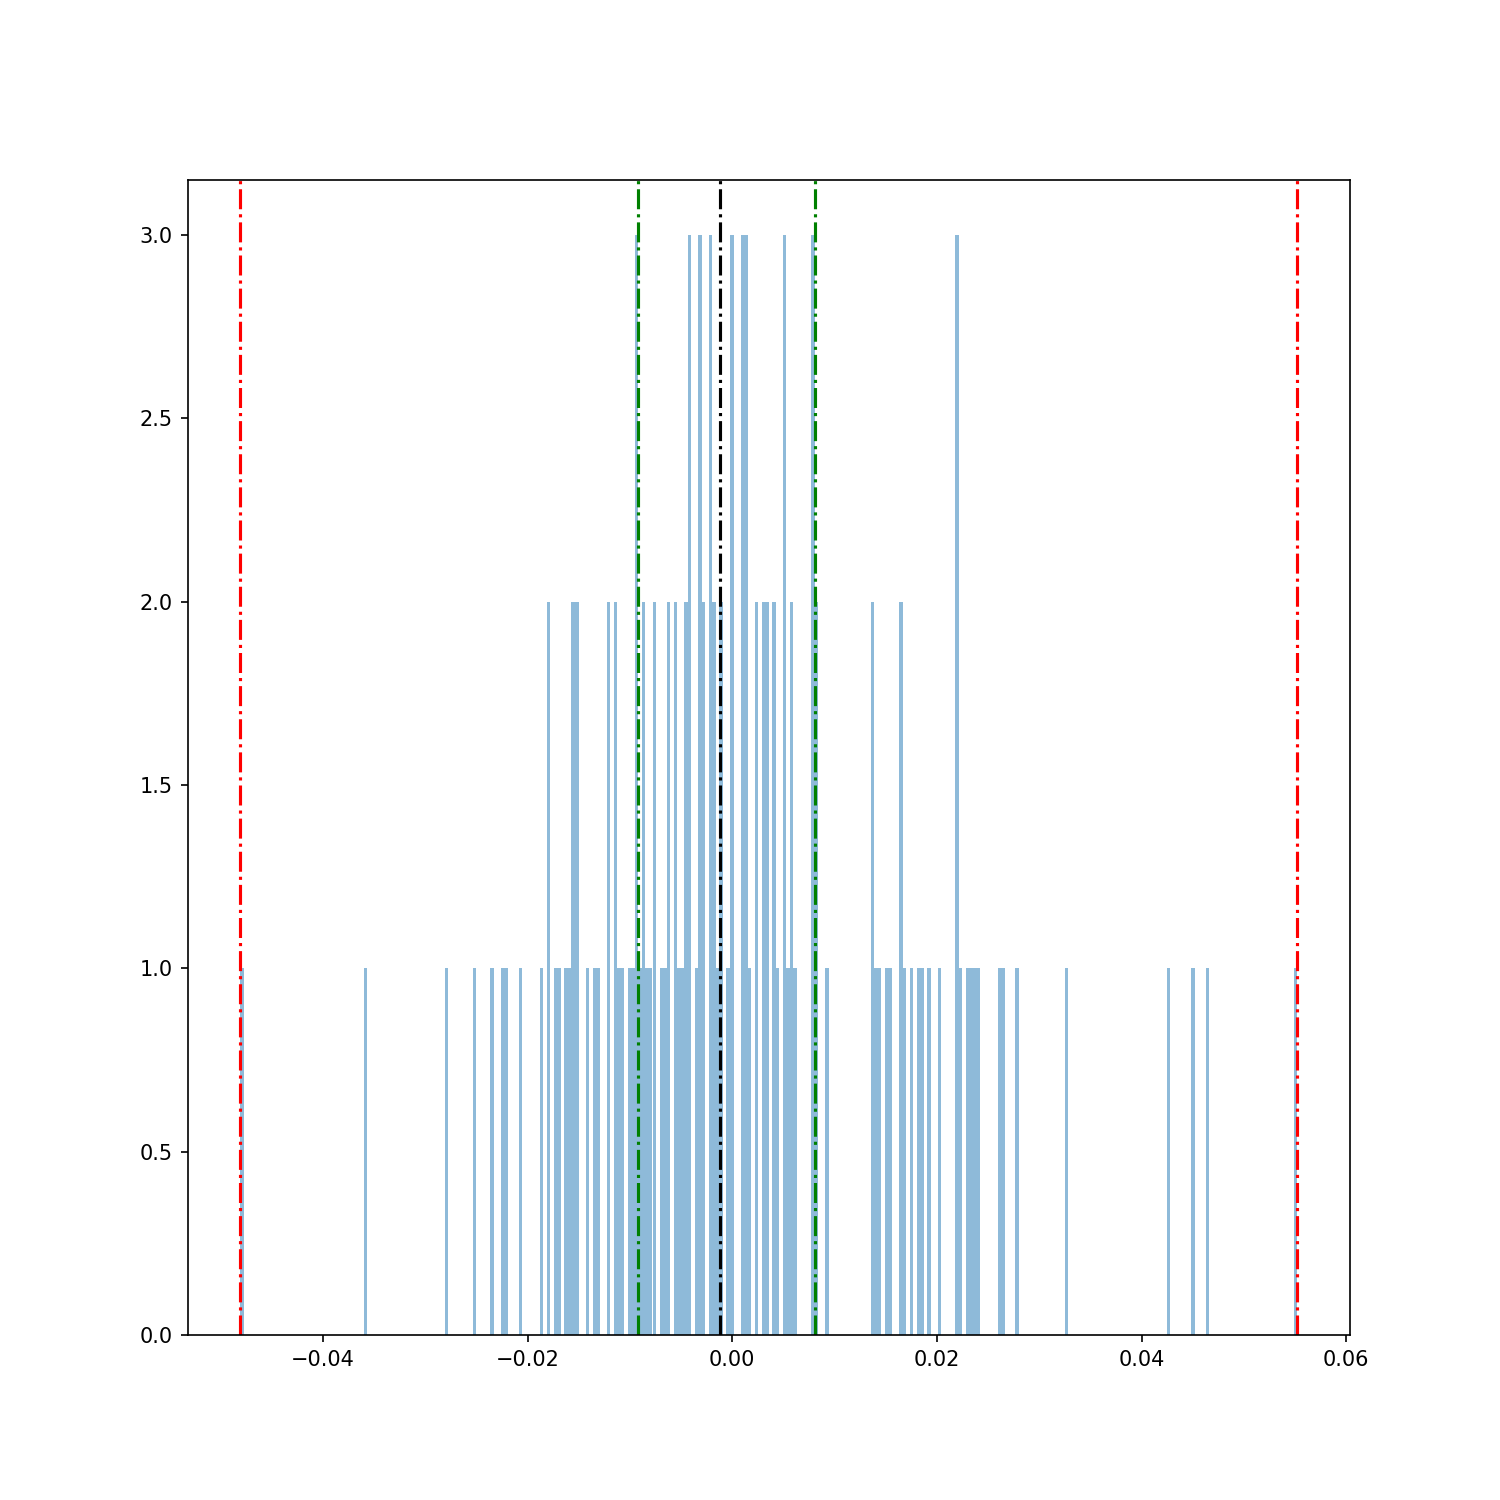

Median : -0.0012343386777396467
Q3 - Q4:  0.04715212985082608
Q1 - Q0:  0.0388420338982554


In [86]:
plt.figure(figsize = (10,10))
plt.hist(stock_close_copy['OC'], bins = 300, alpha = 0.5)
plt.axvline(stock_close_copy['OC'].quantile(0.0), ls = '-.', color = 'r')
plt.axvline(stock_close_copy['OC'].quantile(0.25), ls = '-.', color = 'g')
plt.axvline(stock_close_copy['OC'].quantile(0.5), ls = '-.', color = '#000000')
plt.axvline(stock_close_copy['OC'].quantile(0.75), ls = '-.', color = 'g')
plt.axvline(stock_close_copy['OC'].quantile(1.0), ls = '-.', color = 'r')
plt.show()
print('Median :', stock_close_copy['OC'].median())
print('Q3 - Q4: ', stock_close_copy['OC'].quantile(q = 1.0) - stock_close_copy['OC'].quantile(q = 0.75))
print('Q1 - Q0: ', stock_close_copy['OC'].quantile(q = 0.25) - stock_close_copy['OC'].quantile(q = 0.0))

<IPython.core.display.Javascript object>


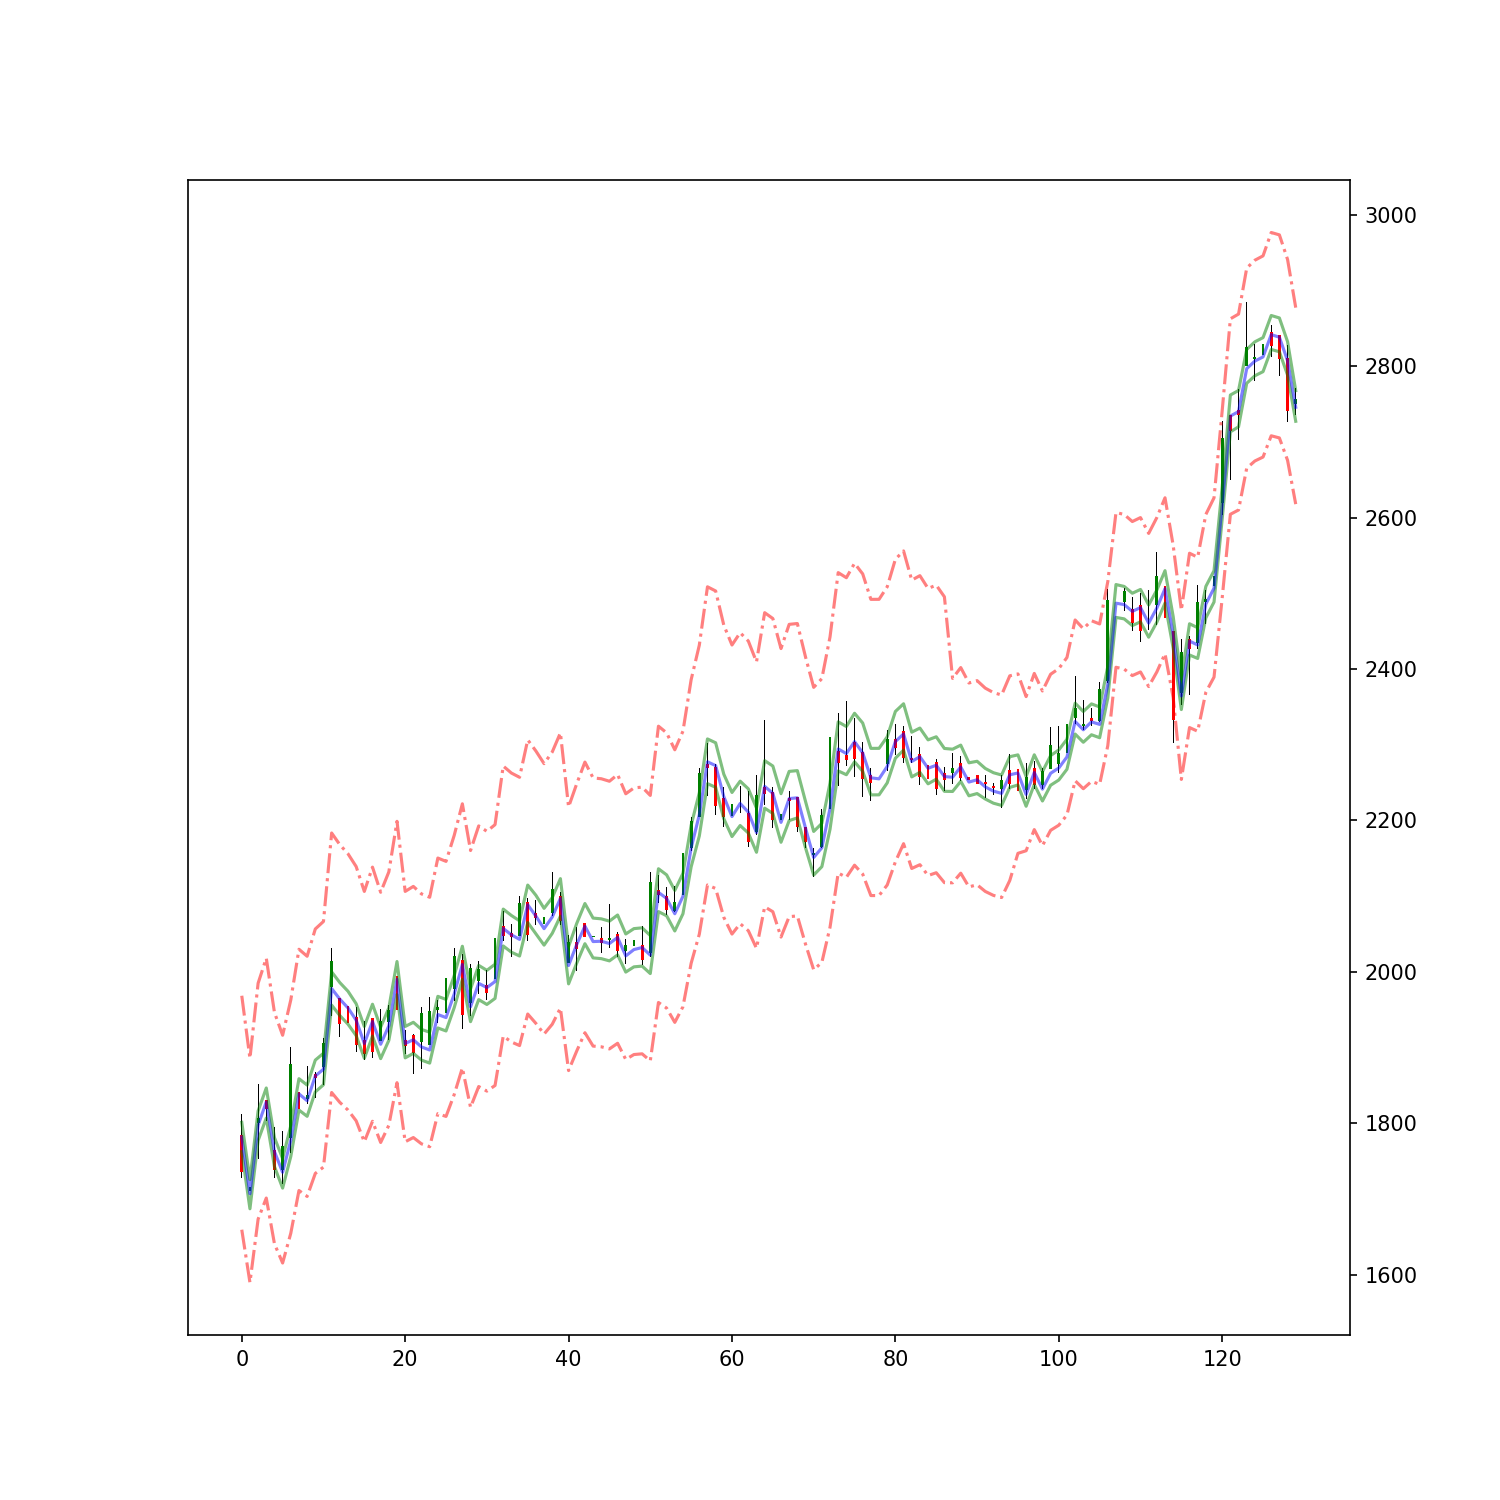

In [83]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
stock_close_copy['Up'] = stock_close_copy['Close'] > stock_close_copy['Open']
stock_close_copy['Bottom'] = np.where(stock_close_copy['Up'], stock_close_copy['Open'], stock_close_copy['Close'])
stock_close_copy['Bar'] = stock_close_copy['High'] - stock_close_copy['Low']
stock_close_copy['Body'] = abs(stock_close_copy['Close'] - stock_close_copy['Open'])
stock_close_copy['Color'] = np.where(stock_close_copy['Up'], 'g', 'r')
ax.yaxis.tick_right()
ax.bar(stock_close_copy.index, 
       bottom = stock_close_copy['Low'], 
       height = stock_close_copy['Bar'],
       width = 0.1,
       color = '#000000')
ax.bar(stock_close_copy.index, 
       bottom = stock_close_copy['Bottom'], 
       height = stock_close_copy['Body'],
       width = 0.35,
       color = stock_close_copy['Color'])

t = 0.5
ax.plot(stock_close_copy['Q0'], color = 'r', ls = '-.', alpha = t)
ax.plot(stock_close_copy['Q1'], color = 'g', alpha = t)
ax.plot(stock_close_copy['Q2'], color = 'b', alpha = t)
ax.plot(stock_close_copy['Q3'], color = 'g', alpha = t)
ax.plot(stock_close_copy['Q4'], color = 'r', ls = '-.', alpha = t)
plt.show()

In [89]:
# inter quartile range
db = stock_close_copy[(stock_close_copy['Close'] >= stock_close_copy['Q1']) & (stock_close_copy['Close'] <= stock_close_copy['Q3'])]
inter_quartile_percentage = len(db) / len(stock_close_copy) * 100
print('Percentage of points in Inter quartile range: {}% '.format(round(inter_quartile_percentage),2))

Percentage of points in Inter quartile range: 58% 


In [ ]:
# forecasting
q1 = stock_close_copy['Open'] * (1 + stock_close_copy['OC'].rolling(sample_size).quantile(q = 0.25))